In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg

In [28]:
A1 = np.array([1,0,1,1,-2,-1,2,1,3,1,0,1]).reshape(4,3)
A1

array([[ 1,  0,  1],
       [ 1, -2, -1],
       [ 2,  1,  3],
       [ 1,  0,  1]])

In [29]:
A2 = np.array([3,-3,0,1,2,3,7,-5,2,3,-1,2]).reshape(4,3)
A2

array([[ 3, -3,  0],
       [ 1,  2,  3],
       [ 7, -5,  2],
       [ 3, -1,  2]])

In [30]:
# so chieu va co so cua u1 = span(A1)
dimU1 = np.linalg.matrix_rank(A1)
print('dimU1: ', dimU1)
U1 = linalg.lu(A1)[2]
print('Co so cua U1: ', A1[:,:-1],sep='\n')

dimU1:  2
Co so cua U1: 
[[ 1  0]
 [ 1 -2]
 [ 2  1]
 [ 1  0]]


In [31]:
# linalg.lu(A1)

In [32]:

# U1

In [33]:
# cho chieu va co so cua u2 = span(A2)
dimU2 = np.linalg.matrix_rank(A2)
print('dimU2: ', dimU2)
U2 = linalg.lu(A2)[2]
print('Co so cua U2: ', A2[:,:-1],sep='\n')
U2



dimU2:  2
Co so cua U2: 
[[ 3 -3]
 [ 1  2]
 [ 7 -5]
 [ 3 -1]]


array([[ 7.        , -5.        ,  2.        ],
       [ 0.        ,  2.71428571,  2.71428571],
       [ 0.        ,  0.        ,  0.        ]])

In [34]:
U3 = U1 + U2
# so chieu va co so cua u3
A3 = np.hstack((A1,A2))
A3

array([[ 1,  0,  1,  3, -3,  0],
       [ 1, -2, -1,  1,  2,  3],
       [ 2,  1,  3,  7, -5,  2],
       [ 1,  0,  1,  3, -1,  2]])

In [38]:
# so chieu va co so cua A3
dimU3 = np.linalg.matrix_rank(A3)
print('so chieu cua U3 = ', dimU3)
U3 = linalg.lu(A3)[2]
U3

so chieu cua U3 =  3


array([[ 2. ,  1. ,  3. ,  7. , -5. ,  2. ],
       [ 0. , -2.5, -2.5, -2.5,  4.5,  2. ],
       [ 0. ,  0. ,  0. ,  0. , -1.4, -1.4],
       [ 0. ,  0. ,  0. ,  0. ,  0.6,  0.6]])

## Hồi quy đa thức

In [39]:
# x       y     x     y
# -1     -6.375 1.778 2.545
# -0.444 -2.211 2.333 0.050
# 0.111  4.491  2.889 4.134
# 0.667  0.146  3.444 13.312
# 1.222  2.987  4     26.058
x = np.array([-1,-0.444,0.111,0.667,1.222,1.778,2.333,2.889,3.444,4])
y = np.array([-6.375,-2.211,4.491,0.146,2.987,2.545,0.050,4.134,13.312,26.058])
p = np.polyfit(x,y,3)


In [41]:
print('p 3 2 1 0: ', p)

p 3 2 1 0:  [ 1.32026397 -4.60377845  3.27292648  2.10197554]


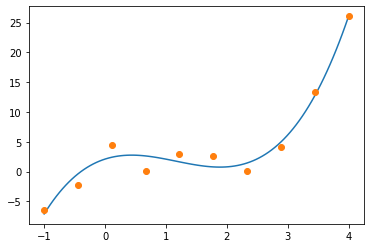

In [42]:
#plot polynomial p
x_new = np.linspace(x.min(),x.max(),100)
y_new = np.polyval(p,x_new)
plt.plot(x_new,y_new)
plt.plot(x,y,'o')
plt.show()

In [46]:
#import curve_fit
from scipy.optimize import curve_fit


In [51]:
#Mo hinh Mechalis-Menten
# x    y
# 0.02 76
# 0.02 47
# 0.06 97
# 0.06 107
# 0.11 123
# 0.11 139
# 0.22 159
# 0.22 152
# 0.56 191
# 0.56 201
# 1.10 207
# 1.10 200
x = np.array([0.02,0.02,0.06,0.06,0.11,0.11,0.22,0.22,0.56,0.56,1.10,1.10])
y = np.array([76,47,97,107,123,139,159,152,191,201,207,200],dtype =float )
print(x)
print(y)
def f(x,a,b):
    return a*x/(b + x)
p0 = [150,0.01]
tham_so_cua_mo_hinh_a_b, ma_tran_hiep_phuong_sai = curve_fit(f,x,y,p0)

[0.02 0.02 0.06 0.06 0.11 0.11 0.22 0.22 0.56 0.56 1.1  1.1 ]
[ 76.  47.  97. 107. 123. 139. 159. 152. 191. 201. 207. 200.]


In [52]:
print('tham so cua mo hinh a b: ', tham_so_cua_mo_hinh_a_b)
print('ma tran hiep phuong sai: ', ma_tran_hiep_phuong_sai)

tham so cua mo hinh a b:  [2.12683651e+02 6.41211389e-02]
ma tran hiep phuong sai:  [[4.82622439e+01 4.40132671e-02]
 [4.40132671e-02 6.85715000e-05]]


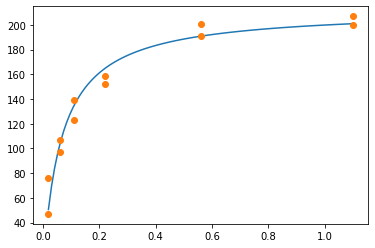

In [53]:
#plot mo hinh
x_new = np.linspace(x.min(),x.max(),100)
y_new = f(x_new,tham_so_cua_mo_hinh_a_b[0],tham_so_cua_mo_hinh_a_b[1])
plt.plot(x_new,y_new)
plt.plot(x,y,'o')
plt.show()
